In [1]:
import serial
import time 
from cvzone.SerialModule import SerialObject

In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
            

In [3]:
#arduino=SerialObject("COM6") #name of port instead of COM6batch_size=16
training_datagenerator= ImageDataGenerator(rescale=1./255, horizontal_flip=True, 
                                          vertical_flip=True, shear_range=0.2, 
                                          zoom_range=0.2, width_shift_range=0.2, 
                                          height_shift_range=0.2, validation_split=0.1)

In [ ]:
train=training_datagenerator.flow_from_directory(r'enter location of training data', 
                                                target_size=(256, 256), 
                                                color_mode='rgb', 
                                                class_mode='binary', batch_size=16, subset='training')

validation=training_datagenerator.flow_from_directory(r'enter location of the training data', 
                                                target_size=(256, 256), 
                                                color_mode='rgb', 
                                                class_mode='binary', batch_size=16, subset='validation')

Found 901 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [5]:
#initializing CNN
cnn=tf.keras.models.Sequential()

#first layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#second layer 
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#third layer 
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#flattening 
cnn.add(tf.keras.layers.Flatten())

#fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#Output Layers
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

#Time to Train our CNN Model 

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'Enter location to save model\New_Model.h5', 
                                             monitor='val_loss', mode="min", 
                                            save_best_only=True)
callbacks=checkpoint

In [8]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit_generator(train, validation_data=validation,epochs=1,  
                  steps_per_epoch=train.samples//16, 
                  validation_steps=validation.samples//16, 
                  callbacks=callbacks)

#steps_per_epochs=train.samples//batch_size,

C:\Users\Swayam\AppData\Local\Temp\ipykernel_13580\569860712.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train, validation_data=validation,epochs=1,


NameError: name 'scipy' is not defined

In [ ]:
#from tensorflow.keras.models import load_model
from keras import models
from keras.models import load_model

cnn=load_model(r'location to load model\New_DL_Model.h5')

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import PIL
#import matplotlib.pyplot as plt

In [ ]:
import cv2
import time

def func():
    # Initialize the camera
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera

    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Could not open camera")
        exit()

    # Delay for 5 seconds
    time.sleep(5)
    print("sleeping")

    # Capture frames until there are no more frames available
    last_frame = None
    while True:
        ret, frame = cap.read()

        # If frame is read correctly, store it
        if ret:
            cv2.imshow("frame", frame)
            if cv2.waitKey(5) & 0xFF == ord("q"):
                last_frame = frame
                print("capturing")
                break
            last_frame = frame
            # Save the last frame as an image file
            if last_frame is not None:
                file_name = 'last_frame.jpg'  # Define the file name and format
                cv2.imwrite(file_name, last_frame)  # Save the frame as an image file
               
                image_testing=r'enter location to pick last frame to check if fire detected or not'

                test_image=image.load_img(image_testing, target_size=(256,256))
                test_image=image.img_to_array(test_image)
                test_image=test_image/255
                test_image=np.expand_dims(test_image,axis=0)

                result=cnn.predict(test_image)
                result

                #result=cnn.predict_classes(test_image)

                if result<0.2:
                    print("fire detected");
                    #aicpp.control_water_pump(1)

                    
                else:
                    print("No fire detected")

                    
                PIL.Image.open(image_testing)

        else:
            break

    # Release the camera
    cap.release()

    # Display the last captured frame
    cv2.imshow('Last Frame', last_frame)
    cv2.waitKey(0)

    cv2.destroyAllWindows()

func()

sleeping
1/1 [==============================] - 0s 61ms/step
No fire detected
1/1 [==============================] - 0s 47ms/step
No fire detected
1/1 [==============================] - 0s 83ms/step
No fire detected
1/1 [==============================] - 0s 64ms/step
No fire detected
1/1 [==============================] - 0s 73ms/step
No fire detected
1/1 [==============================] - 0s 83ms/step
No fire detected
1/1 [==============================] - 0s 85ms/step
No fire detected
1/1 [==============================] - 0s 74ms/step
No fire detected
1/1 [==============================] - 0s 59ms/step
No fire detected
1/1 [==============================] - 0s 104ms/step
No fire detected
1/1 [==============================] - 0s 79ms/step
No fire detected
1/1 [==============================] - 0s 85ms/step
No fire detected
1/1 [==============================] - 0s 81ms/step
No fire detected
1/1 [==============================] - 0s 88ms/step
No fire detected
1/1 [===================

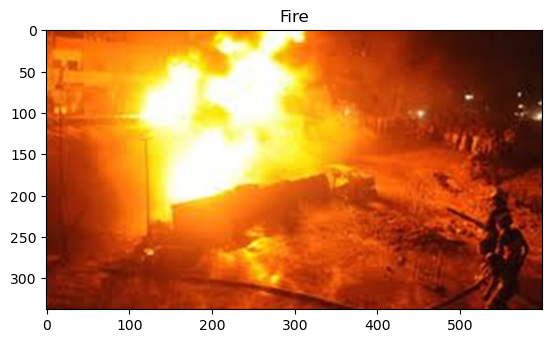

In [14]:
categories=['Fire', 'No Fire']

image_show=PIL.Image.open(image_testing)
plt.imshow(image_show)

plt.title(categories[int(result[0][0])])
plt.show()
